# Challenge Set 2<br >
Topic:        Pandas<br >
Date:         07/18/2016<br >
Name:         Seth Kaufman

In [22]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.image as image
import numpy as np
import brewer2mpl
dpi = 36; imageSize = (6,6)
im = image.imread('panda.png')
set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors
np.random.seed(10)
%matplotlib inline


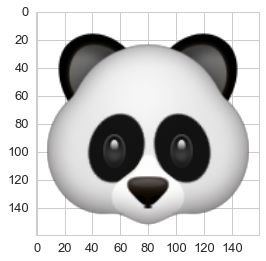

In [23]:
plt.imshow(im,zorder=1);

# Pandas Challenges

Topic: Pandas (Exploring and visualizing our scraped movie data in pandas)

Just getting started? Read this guide: 10 minutes to pandas

Data: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: 2013_movies.csv



### Challenge 1

Plot domestic total gross over time.



In [24]:
mojo = pd.read_csv('../../../challenges_data/2013_movies.csv',parse_dates=[6],
                   dtype={'Budget':float,'DomesticTotalGross':int,'Runtime':int})
mojo.sort_values('ReleaseDate',inplace=True)
mojo.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25


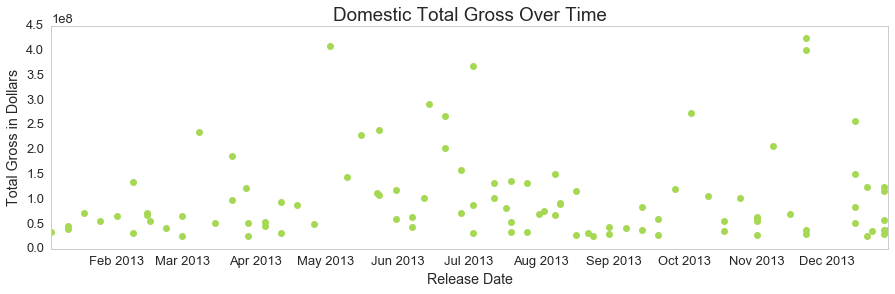

In [25]:
fig = sns.plt.figure(figsize=[15,4])
y = np.polyfit(mojo.ReleaseDate.apply(lambda x : datetime.datetime.timestamp(x)),mojo.DomesticTotalGross,3)
sns.set(style="whitegrid", palette="GnBu_d",font_scale=1.3)
plt.title('Domestic Total Gross Over Time',fontsize='large')
plt.ylabel('Total Gross in Dollars')
plt.grid(b='off')
plt.xlabel('Release Date')
sns.plt.plot_date(x=mojo.ReleaseDate,y=mojo.DomesticTotalGross,color=color)
plt.show()


Challenge 2

Plot runtime vs. domestic total gross.

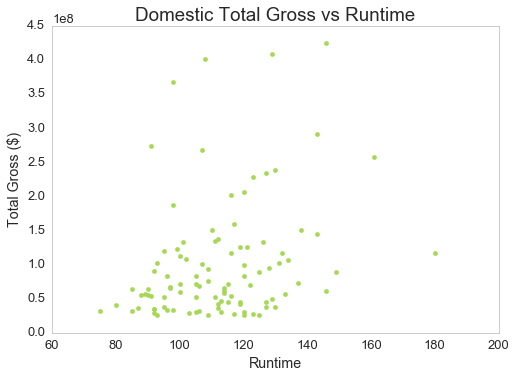

In [33]:
sns.set(style="whitegrid", palette="GnBu_d",font_scale=1.3)
plt.title('Domestic Total Gross vs Runtime',fontsize='large')
plt.ylabel('Total Gross ($)')
plt.grid(b='off')
plt.xlabel('Runtime')
sns.plt.scatter(mojo['Runtime'],mojo['DomesticTotalGross'],color=color)
plt.show()

Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [34]:
group_byrating = mojo.groupby('Rating')[['Runtime','DomesticTotalGross']].mean()
group_byrating

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.



In [35]:
set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors

/Users/Seth/Applications/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


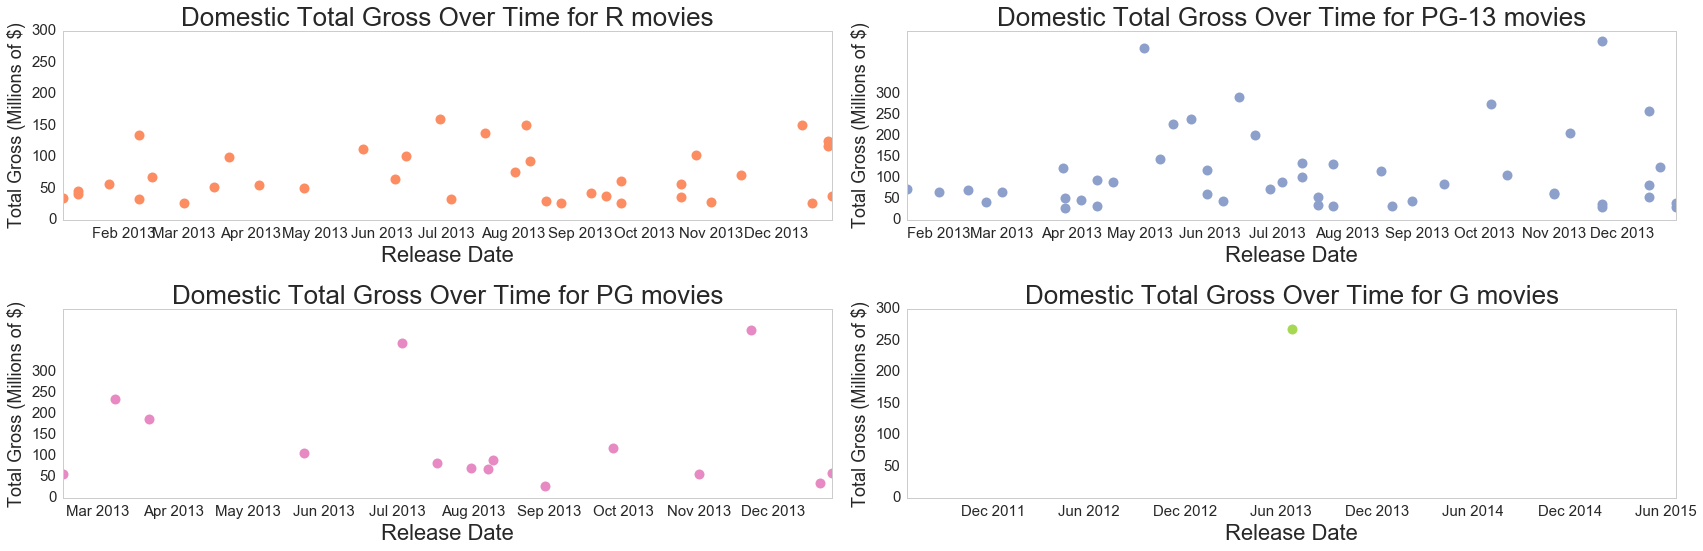

In [36]:
rating_fig=sns.plt.figure(figsize=[24,8])
sns.set(style="whitegrid", palette="GnBu_d",font_scale=1.5)
ratings = mojo['Rating'].unique()
rating_fig.set_tight_layout(True)

for i,r in enumerate(ratings,1):
    ax = rating_fig.add_subplot(2,2,i)
    color = set2[i]
    sns.plt.plot_date(x=mojo[mojo['Rating']==r].ReleaseDate,y=mojo[mojo['Rating']==r].DomesticTotalGross, 
                          fmt ='o',linestyle='', color=color, alpha=1,markersize=10)
    plt.yticks(np.linspace(0,3*10**8,7),(range(0,350,50)))
    ax.set_title('Domestic Total Gross Over Time for %s movies'%r,fontsize='26')
    ax.set_ylabel('Total Gross (Millions of $)',fontsize='18')
    ax.grid(b='off')
    ax.set_xlabel('Release Date',fontsize='22')

Challenge 5

What director in your dataset has the highest gross per movie?




In [37]:
mojo.groupby('Director')['DomesticTotalGross'].mean().sort_values(ascending=False)[:5]

Director
Francis Lawrence             424668047
Shane Black                  409013994
Chris BuckJennifer Lee       400738009
Pierre CoffinChris Renaud    368061265
Zack Snyder                  291045518
Name: DomesticTotalGross, dtype: int64

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

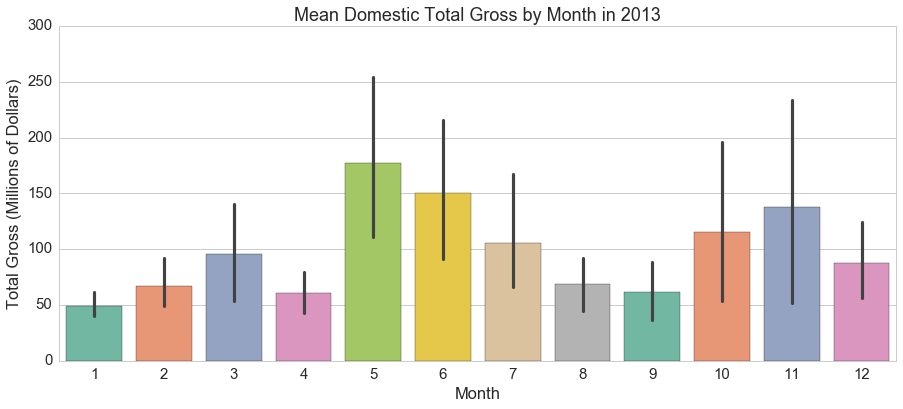

In [38]:
rd_indexed = mojo.set_index('ReleaseDate')['DomesticTotalGross']
plt.figure(figsize=[15,6])
sns.barplot(rd_indexed.index.month,rd_indexed.values,palette='Set2',antialiased=True)
plt.yticks(np.linspace(0,3*10**8,7),(range(0,350,50)))
plt.title('Mean Domestic Total Gross by Month in 2013')
plt.xlabel('Month')
plt.ylabel('Total Gross (Millions of Dollars)')
plt.show()

### Sample Standard Error $= \frac{s}{\sqrt n}$ <br>
The error is high due to the small sample sizes

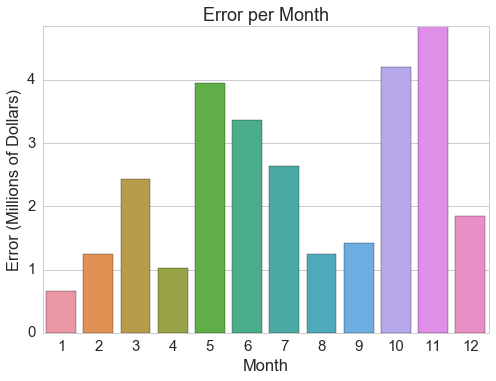

In [39]:
import statistics as stats
error = rd_indexed.groupby(pd.TimeGrouper(freq='1M')).apply(lambda x : stats.stdev(x)/np.sqrt(len(x)))
plt.yticks(np.linspace(0,5*10**7,6),(range(0,6,1)))
plt.title('Error per Month')
plt.xlabel('Month')
plt.ylabel('Error (Millions of Dollars)')
sns.barplot(error.index.month,error.values);